# Restrictions during the COVID-19 Pandemic


In [1]:
import matplotlib.pyplot as plt
import functions
import numpy as np
np.random.seed(42)

from sklearn.linear_model import Ridge

import warnings
warnings.simplefilter('ignore')

In [2]:
# We are looking at the middle of the pandemic
period = '2020-09-30'

# Number of weeks to predict
steps = 7

# Recursive multi-step forecasting with exogenous variables

## Forecasting Searches for Least Restricted States in the Middle of COVID-19 Pandemic 

### with Exoginous Variables 


 Forecast for most_restricted and depression untill 2020-09-30 

Test error (mse): 22.05 



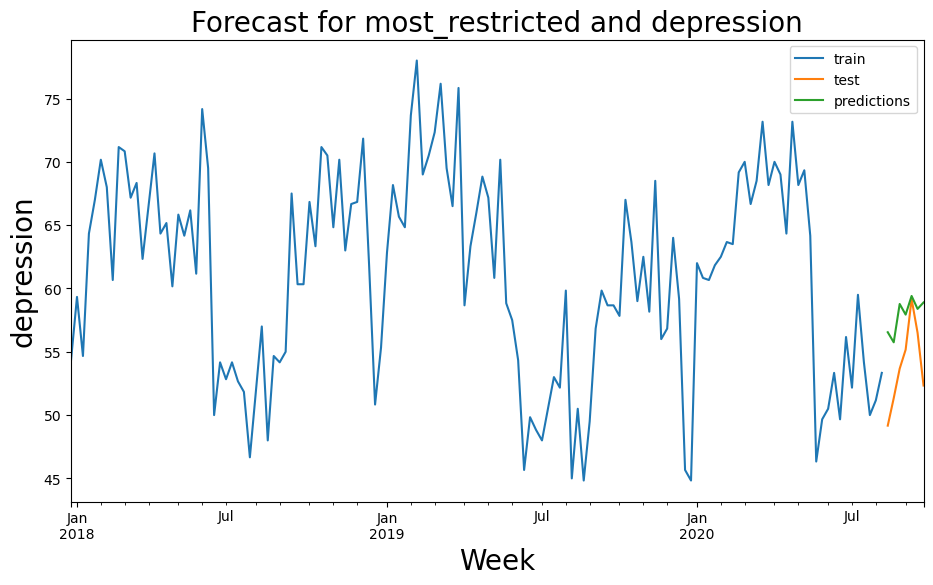


 Forecast for most_restricted and anxiety untill 2020-09-30 

Test error (mse): 63.52 



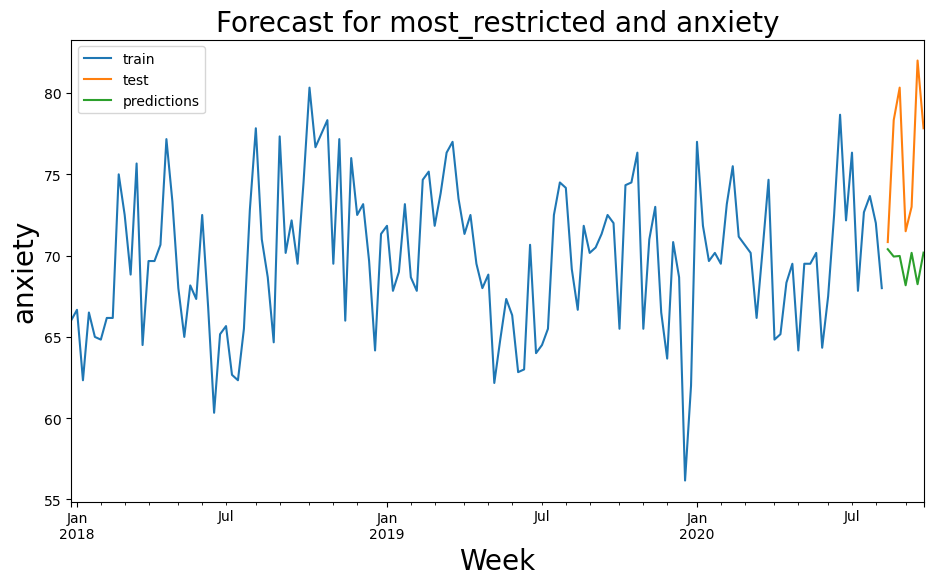


 Forecast for most_restricted and addiction untill 2020-09-30 

Test error (mse): 2.8 



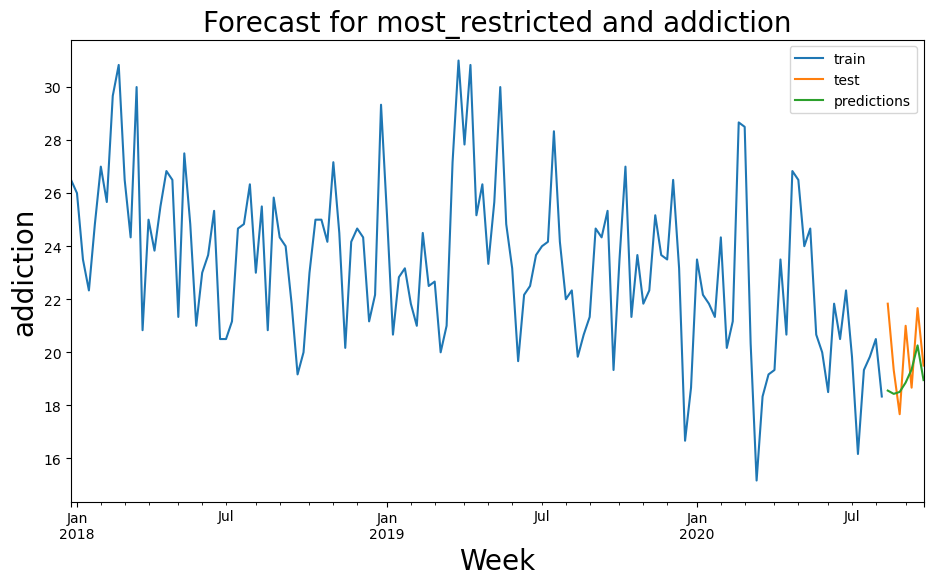


 Forecast for most_restricted and counselling untill 2020-09-30 

Test error (mse): 6.88 



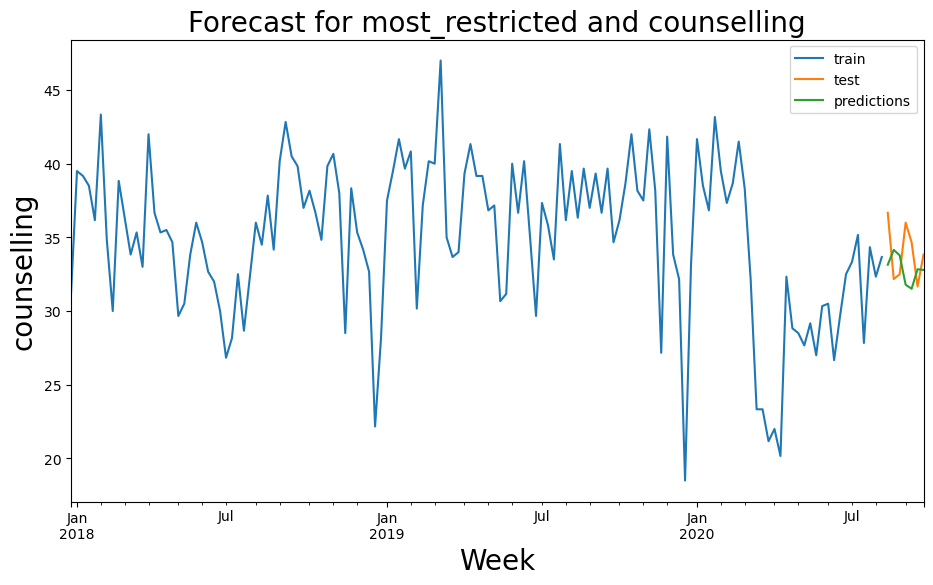


 Forecast for most_restricted and mental_health untill 2020-09-30 

Test error (mse): 15.04 



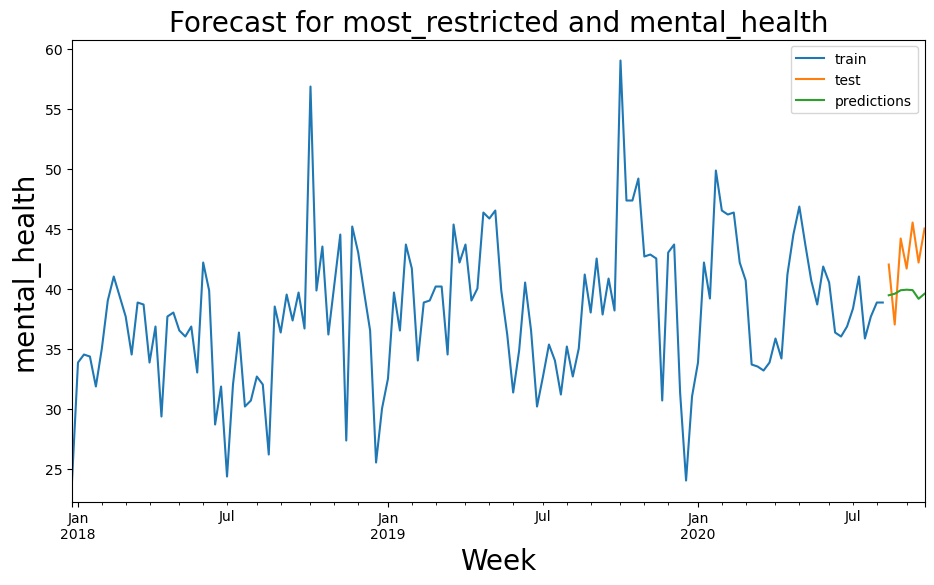

In [3]:
searches_list = ['depression', 'anxiety', 'addiction', 'counselling', 'mental_health']
fa_mse_dic_most = {}
for search in searches_list:
        mse = functions.forecast_file_search(file='most_restricted', period=period, steps=steps, search=search, regressor=Ridge(), lags=15)
        plt.show()
        fa_mse_dic_most[f'{search}_ex'] = mse

Mean Standard Error (MSE) for all models is significantly lower than 100, which is a relatively good result. We tried hyperparameter tuning but it did not improve the MSE. 

### without Exoginous Variables 

In [4]:
for search in searches_list:
        mse = functions.forecast_file_search_without_exogin(file='most_restricted', period=period, steps=steps, search=search, regressor=Ridge(), lags=15)
        fa_mse_dic_most[search] = mse


 Forecast for most_restricted and depression untill 2020-09-30 

Test error (mse): 44.74 


 Forecast for most_restricted and anxiety untill 2020-09-30 

Test error (mse): 69.47 


 Forecast for most_restricted and addiction untill 2020-09-30 

Test error (mse): 3.68 


 Forecast for most_restricted and counselling untill 2020-09-30 

Test error (mse): 6.09 


 Forecast for most_restricted and mental_health untill 2020-09-30 

Test error (mse): 21.31 



In [5]:
# Find differences between MSE with and without exogenous features. Negative values indicate that Exogenous features improved MSE
rf_diff_most = functions.dict_diff(fa_mse_dic_most)
print(rf_diff_most)

{'depression': -22.69, 'anxiety': -5.95, 'addiction': -0.88, 'counselling': 0.79, 'mental_health': -6.27}


The models for the most restricted states were improved when it came to forecasting 'anxiety', 'mental health' and particularly 'depression', when exogenous features were included in the modelling. The models for forecasting 'addiction' and 'counselling' performed relatively similarly regardless of if exogenous features were included in the model.

## Forecasting Searches for Least Restricted States in the Middle of COVID-19 Pandemic 

###  with Exogenous Variables 


 Forecast for most_restricted and depression untill 2020-09-30 

Test error (mse): 22.05 



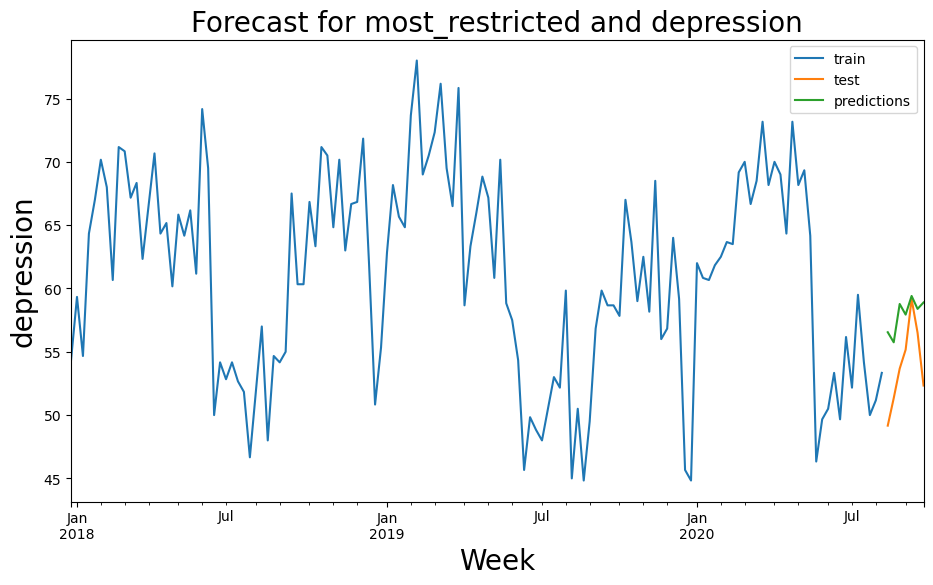


 Forecast for most_restricted and anxiety untill 2020-09-30 

Test error (mse): 63.52 



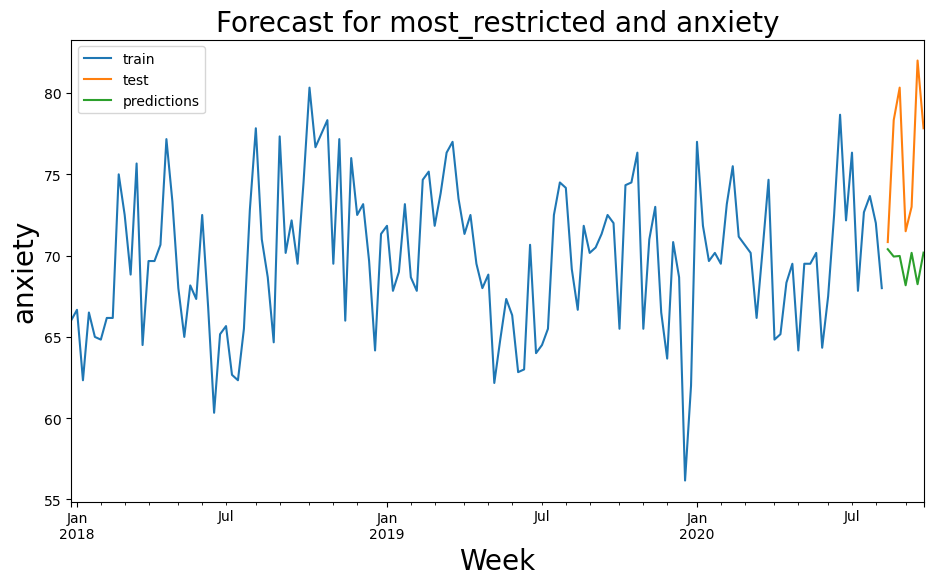


 Forecast for most_restricted and addiction untill 2020-09-30 

Test error (mse): 2.8 



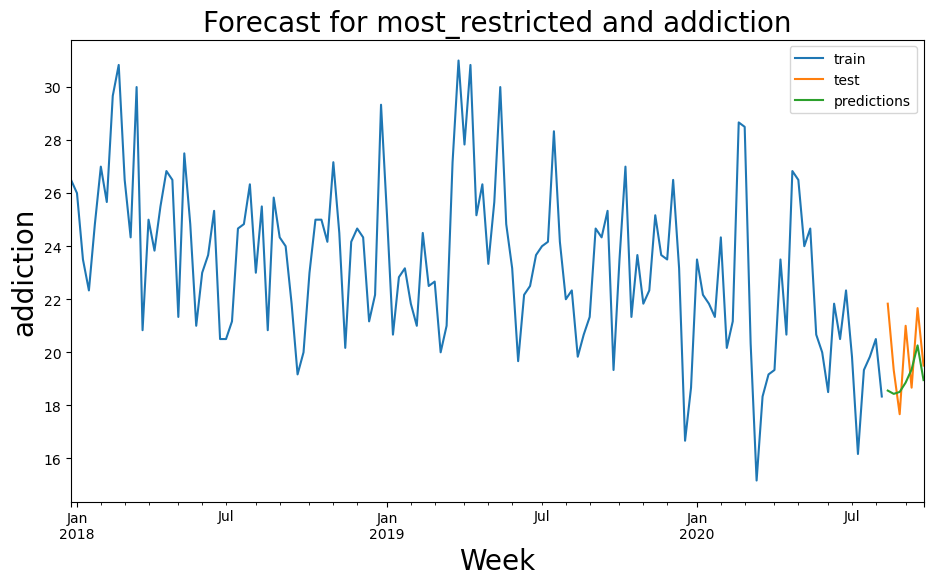


 Forecast for most_restricted and counselling untill 2020-09-30 

Test error (mse): 6.88 



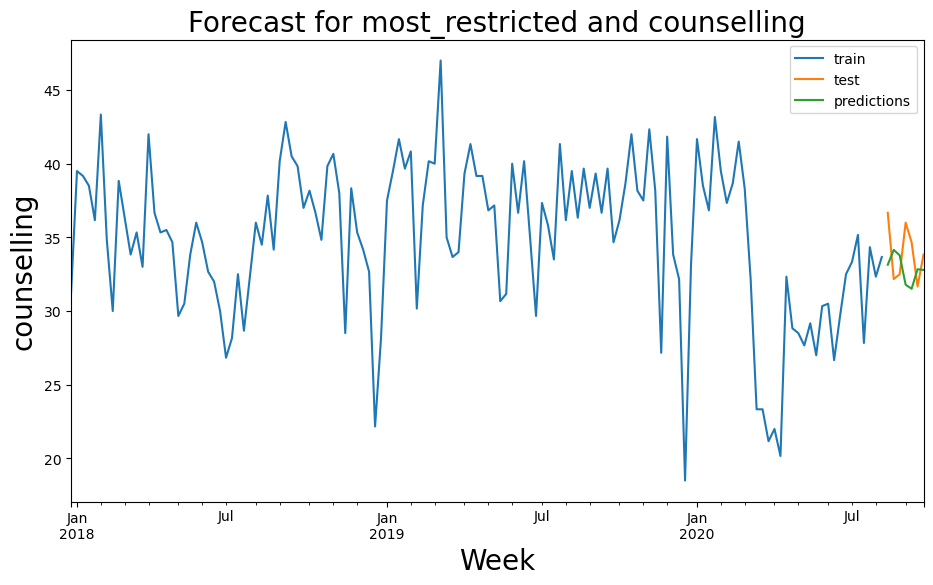


 Forecast for most_restricted and mental_health untill 2020-09-30 

Test error (mse): 15.04 



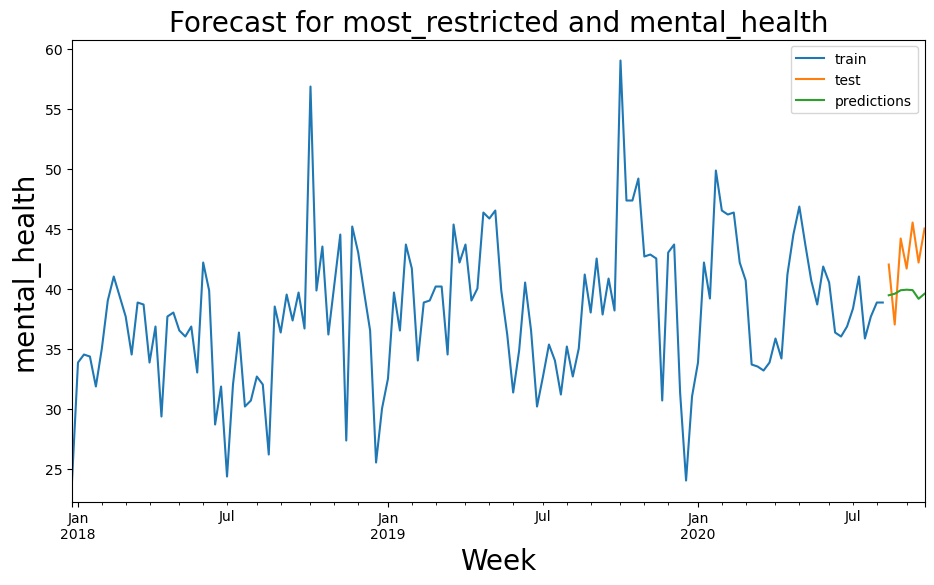

In [17]:
searches_list = ['depression', 'anxiety', 'addiction', 'counselling', 'mental_health']
fa_mse_dic_most = {}
for search in searches_list:
        mse = functions.forecast_file_search(file='most_restricted', period=period, steps=steps, search=search, regressor=Ridge(), lags=15)
        plt.show()
        fa_mse_dic_most[f'{search}_ex'] = mse

Mean Standard Error (MSE) for all models is significantly lower than 100, which is a relatively good result. We tried hyperparameter tuning but it did not improve the MSE.

### without Exoginous Variables 

In [18]:
for search in searches_list:
        mse = functions.forecast_file_search_without_exogin(file='least_restricted', period=period, steps=steps, search=search, regressor=Ridge(), lags=15)
        fa_mse_dic_least[search] = mse


 Forecast for least_restricted and depression untill 2020-09-30 



ValueError: time data <<<<<<< HEAD doesn't match format specified

In [19]:
# Find differences between MSE with and without exogenous features. Negative values indicate that Exogenous features improved MSE
rf_diff_least = functions.dict_diff(fa_mse_dic_least)
print(rf_diff_least)

{}


The models for the least restricted states ...

---

# SARIMAX

## Forecasting Searches for Most Restricted States in the Middle of COVID-19 Pandemic 

### With Exogenous Features


 Forecast for most_restricted and depression untill 2020-09-30 

MSE
8.85


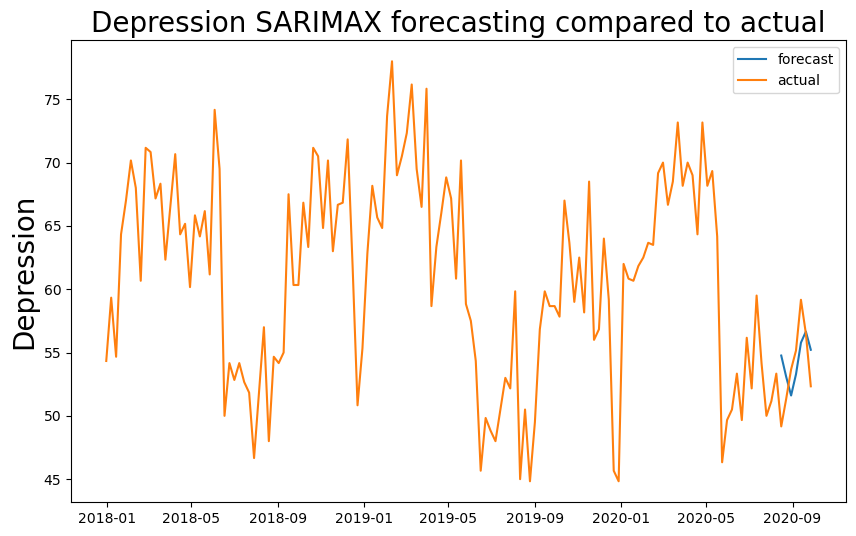


 Forecast for most_restricted and anxiety untill 2020-09-30 

MSE
49.3


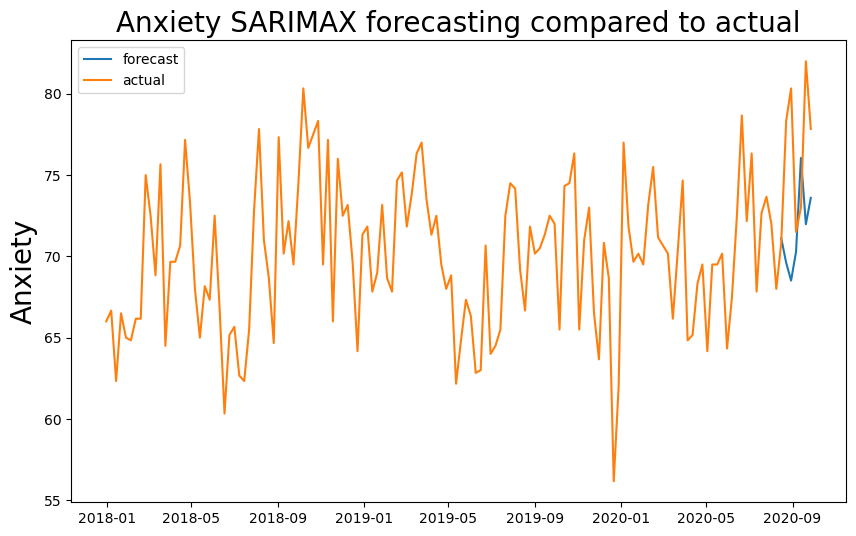


 Forecast for most_restricted and addiction untill 2020-09-30 

MSE
4.48


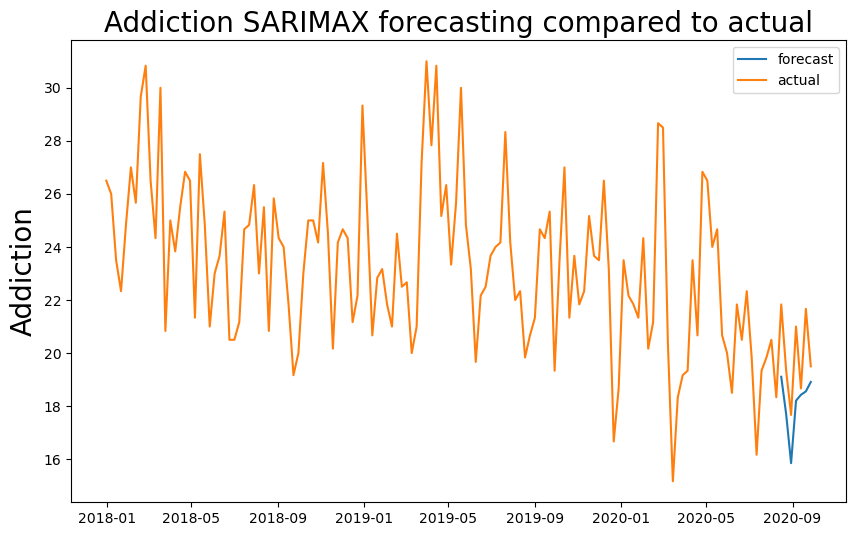


 Forecast for most_restricted and counselling untill 2020-09-30 

MSE
6.71


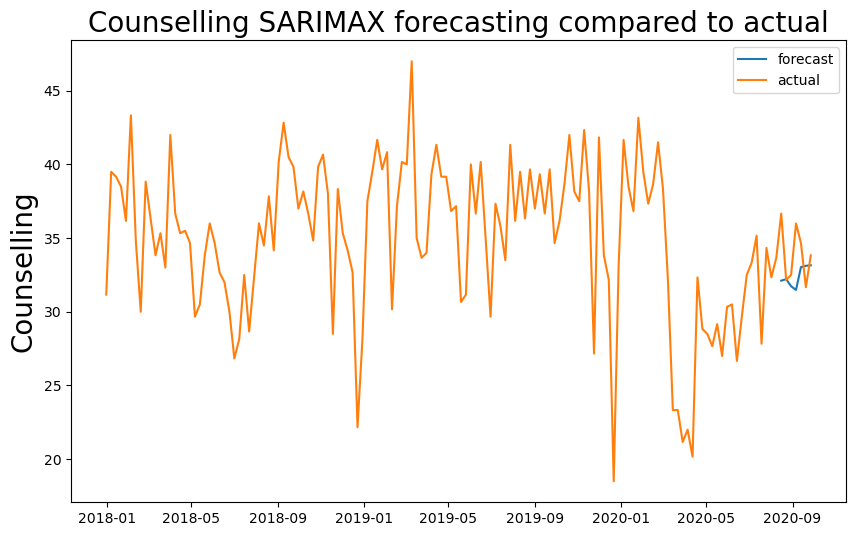


 Forecast for most_restricted and mental_health untill 2020-09-30 

MSE
35.95


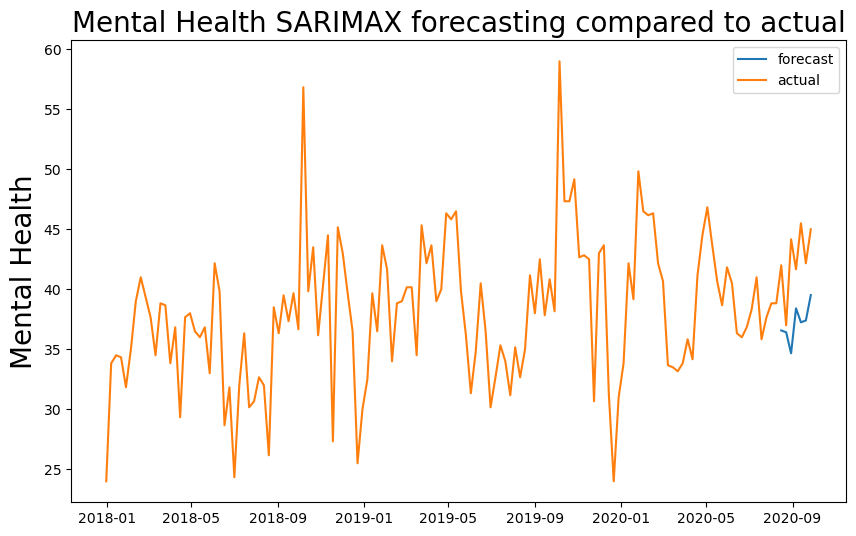

In [22]:
mse_dic_most = {}
for search in searches_list:
    mse = functions.sarimax_forecast_file_search(file='most_restricted', period=period, steps=steps, search=search, plot=True)
    mse_dic_most[f'{search}_ex'] = mse
    plt.show()

Overall, MSE of SARIMAX models is similar to that for Recursive Multi-step Forecasting. Once again, we tried to grid search hyperparameters, but found little change in performance.

### without Exogenous Variables 

In [23]:
for search in searches_list:
    mse = functions.sarima_forecast_file_search(file='most_restricted', period=period, steps=steps, search=search, plot=False)
    mse_dic_most[search] = mse
    plt.show()


 Forecast for most_restricted and depression untill 2020-09-30 

MSE
9.41

 Forecast for most_restricted and anxiety untill 2020-09-30 

MSE
60.9

 Forecast for most_restricted and addiction untill 2020-09-30 

MSE
1.45

 Forecast for most_restricted and counselling untill 2020-09-30 

MSE
11.03

 Forecast for most_restricted and mental_health untill 2020-09-30 

MSE
13.34


In [24]:
# Find differences between MSE with and without exogenous features. Negative values indicate that Exogenous features improved MSE
sarima_diff_most = functions.dict_diff(mse_dic_most)
print(sarima_diff_most)

{'depression': -0.56, 'anxiety': -11.6, 'addiction': 3.03, 'counselling': -4.32, 'mental_health': 22.61}


The models for most restricted states were only improved by including exogenous features when forecasting 'anxiety' and 'counselling' (to a lesser extent). There was no significant difference in performance for forecasting 'depression' in models with or without exogenous features. The models without exogenous features performed better for forecasting 'mental health' and 'addiction' (to a lesser extent) searches. 

## Least Restricted States

### With Exogenous Features

In [25]:
mse_dic_least = {}
for search in searches_list:
    mse = functions.sarimax_forecast_file_search(file='least_restricted', period='2020-05-30', steps=steps, search=search, plot=True)
    mse_dic_least[f'{search}_ex'] = mse
    plt.show()


 Forecast for least_restricted and depression untill 2020-05-30 



ValueError: cannot reindex on an axis with duplicate labels

### Without Exogenous Features

In [26]:
for search in searches_list:
    mse = functions.sarima_forecast_file_search(file='least_restricted', period=period, steps=steps, search=search, plot=False)
    mse_dic_least[search] = mse
    plt.show()


 Forecast for least_restricted and depression untill 2020-09-30 



ValueError: cannot reindex on an axis with duplicate labels

In [27]:
# Find differences between MSE with and without exogenous features. Negative values indicate that Exogenous features improved MSE
sarima_diff_least = functions.dict_diff(mse_dic_least)
print(sarima_diff_least)

{}


For least restricted states...

---

## Conclusion

During the pandemic, when state-mandated COVID-19 restrictions were in effect, ...